# Can you go the distance? A look at the FordGo Bikes.
## by Matthew Johnson

## Preliminary Wrangling

## Data Gathering

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
from zipfile import ZipFile
import re
import zipfile
import time
from matplotlib.ticker import ScalarFormatter

%matplotlib inline

In [2]:
urls = ["https://s3.amazonaws.com/fordgobike-data/201801-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201802-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201803-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201804-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201805-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201806-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201807-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201808-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201809-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201810-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201811-fordgobike-tripdata.csv.zip",
       "https://s3.amazonaws.com/fordgobike-data/201812-fordgobike-tripdata.csv.zip"]

The above is a list of urls obtained from https://www.fordgobike.com/system-data.

In [3]:
folder_name = 'Bike_Zips'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
for url in urls:
    r = requests.get(url, allow_redirects=True)
    with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
        file.write(r.content)
os.listdir(folder_name)

['201801-fordgobike-tripdata.csv.zip',
 '201802-fordgobike-tripdata.csv.zip',
 '201803-fordgobike-tripdata.csv.zip',
 '201804-fordgobike-tripdata.csv.zip',
 '201805-fordgobike-tripdata.csv.zip',
 '201806-fordgobike-tripdata.csv.zip',
 '201807-fordgobike-tripdata.csv.zip',
 '201808-fordgobike-tripdata.csv.zip',
 '201809-fordgobike-tripdata.csv.zip',
 '201810-fordgobike-tripdata.csv.zip',
 '201811-fordgobike-tripdata.csv.zip',
 '201812-fordgobike-tripdata.csv.zip']

Created a folder to store the downloaded zip files in. THe following loop iterates over the list created earlier. For each url, it gets the contents and writes them to the created folder 'Bike_Zips'

In [4]:
folder = 'Exracted_Zippers'
if not os.path.exists(folder):
    os.makedirs(folder)

Created a folder called 'Extracted_Zippers' to extract the data into

In [5]:
os.getcwd()

'C:\\Users\\MJohnson1\\Desktop\\Project Template'

I ran the above to get an idea of what directory I am working in because this will be important for reading and writing the files.

In [6]:
for zips in os.listdir(folder_name):
    os.chdir(folder_name)
    zfile = zipfile.ZipFile(zips)
    os.chdir('..')
    zfile.extractall(os.chdir(folder))
    os.chdir('..')

This loop will change directories to the folder containing the zip files and then extract the contents of that file into another folder via chdir.

In [7]:
os.listdir(folder)

['.ipynb_checkpoints',
 '201801-fordgobike-tripdata.csv',
 '201802-fordgobike-tripdata.csv',
 '201803-fordgobike-tripdata.csv',
 '201804-fordgobike-tripdata.csv',
 '201805-fordgobike-tripdata.csv',
 '201806-fordgobike-tripdata.csv',
 '201807-fordgobike-tripdata.csv',
 '201808-fordgobike-tripdata.csv',
 '201809-fordgobike-tripdata.csv',
 '201810-fordgobike-tripdata.csv',
 '201811-fordgobike-tripdata.csv',
 '201812-fordgobike-tripdata.csv']

Verified that our data was extracted successfully.

In [8]:
Lizt = ['201801-fordgobike-tripdata.csv',
 '201802-fordgobike-tripdata.csv',
 '201803-fordgobike-tripdata.csv',
 '201804-fordgobike-tripdata.csv',
 '201805-fordgobike-tripdata.csv',
 '201806-fordgobike-tripdata.csv',
 '201807-fordgobike-tripdata.csv',
 '201808-fordgobike-tripdata.csv',
 '201809-fordgobike-tripdata.csv',
 '201810-fordgobike-tripdata.csv',
 '201811-fordgobike-tripdata.csv',
 '201812-fordgobike-tripdata.csv']

Created a list of our extracted data files and then changed directories to that folder.

In [9]:
os.chdir(folder)

In [10]:
df = pd.DataFrame
for aFile in Lizt:
    if df.empty:
        df=pd.read_csv(aFile)
    else:
        df1 = pd.read_csv(aFile)
        df = pd.concat([df,df1],ignore_index=True)
df.reset_index(drop=True, inplace=True)

The above loop is courtesy of a mentor in the student hub. Myles' loop will check if df is empty and then read in data depending on that or not. If it is not empty, then it reads in the csv as a new df and then gets concatenated to the original df.

## Data Exploration and Wrangling
> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [11]:
print(df.shape)
print(df.dtypes)
print(df.head(10))

(1863721, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:

In [12]:
df_clean = df.copy()

Created a copy of  our df, so that the original will always remain in tact, should we need to refer back to it later.

In [13]:
df_clean['start_time'] =  pd.to_datetime(df_clean.start_time)
df_clean['end_time'] = pd.to_datetime(df_clean.end_time)

One column I want to split into separate columns is the start and end time columns. The plan is to answer that question of time, so I want to take a look at each part of that column individually.

In [14]:
df_clean["start_month#"] = df_clean["start_time"].dt.month
df_clean["start_monthName"] = df_clean["start_time"].dt.strftime('%B')
df_clean["start_hour"] = df_clean["start_time"].dt.hour
df_clean['weekday'] = df_clean['start_time'].dt.dayofweek

The above will pull and create columns for the month/month name, the starting hour, and the day of the week

In [15]:
dayOfWeek= {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df_clean['weekday_name'] = df_clean['start_time'].dt.dayofweek.map(dayOfWeek)

I wanted names for weekday names, so I mapped those values to those numbers to increase clarity on weekdays.

In [16]:
df_clean.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month#,start_monthName,start_hour,weekday,weekday_name
1245693,547,2018-09-25 15:55:15.857,2018-09-25 16:04:23.741,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,...,2970,Subscriber,1962.0,Female,No,9,September,15,1,Tuesday
683110,1082,2018-06-22 07:09:38.183,2018-06-22 07:27:40.491,16.0,Steuart St at Market St,37.794130,-122.394430,116.0,Mississippi St at 17th St,37.764802,...,3953,Subscriber,1975.0,Male,No,6,June,7,4,Friday
460015,302,2018-05-29 17:36:58.105,2018-05-29 17:42:00.222,79.0,7th St at Brannan St,37.773492,-122.403673,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,...,3640,Subscriber,1984.0,Male,Yes,5,May,17,1,Tuesday
886702,982,2018-07-21 14:50:34.831,2018-07-21 15:06:57.233,224.0,21st Ave at International Blvd,37.785157,-122.238915,201.0,10th St at Fallon St,37.797673,...,872,Subscriber,1987.0,Female,No,7,July,14,5,Saturday
98025,691,2018-02-28 08:52:52.502,2018-02-28 09:04:23.524,182.0,19th Street BART Station,37.809013,-122.268247,193.0,Grand Ave at Santa Clara Ave,37.812744,...,2194,Subscriber,1976.0,Other,No,2,February,8,2,Wednesday
543455,778,2018-05-14 18:30:00.433,2018-05-14 18:42:58.654,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,64.0,5th St at Brannan St,37.776754,...,2875,Customer,1984.0,Male,No,5,May,18,0,Monday
1579870,381,2018-10-03 14:07:34.108,2018-10-03 14:13:56.062,14.0,Clay St at Battery St,37.795001,-122.399970,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1730,Subscriber,1991.0,Male,No,10,October,14,2,Wednesday
970509,498,2018-07-09 17:43:32.828,2018-07-09 17:51:50.926,66.0,3rd St at Townsend St,37.778742,-122.392741,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,3113,Subscriber,1981.0,Female,No,7,July,17,0,Monday
673822,497,2018-06-23 14:53:16.534,2018-06-23 15:01:34.337,110.0,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,102.0,Irwin St at 8th St,37.766883,...,2912,Customer,1987.0,Male,No,6,June,14,5,Saturday
1485907,934,2018-10-17 18:36:26.374,2018-10-17 18:52:00.933,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,245.0,Downtown Berkeley BART,37.870139,...,1409,Subscriber,1998.0,Male,No,10,October,18,2,Wednesday


Just a quick sample of our data, everything is still working.

In [17]:
df_clean.start_hour.value_counts()

17    220014
8     206729
18    171335
9     160974
16    143045
19    103930
7     101793
15     96747
12     90140
13     87780
10     84232
14     83207
11     79511
20     66566
21     46956
6      36359
22     31056
23     18645
0      10234
5      10027
1       5884
2       3697
4       2740
3       2120
Name: start_hour, dtype: int64

In [18]:
df_clean['duration_minutes'] = df['duration_sec']/60

Minutes are a bit easier to digest than a second count, created a minutes column instead for our duration evaluation.

In [19]:
df_clean['Age'] = 2018 - df['member_birth_year']

Because our data is all from the year 2018, we'll be subtracting birth year from 2018 in order to get a more easily recognizable number for our Age column.

In [20]:
ordinal_var_dict = {'start_monthName': ['January','February','March','April','May','June','July','August','September',
                                        'October', 'November','December'],
                   'weekday_name': ['Monday', 'Tuesday', 'Wednesday','Thursday','Friday','Saturday','Sunday']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    df_clean[var] = df_clean[var].astype(ordered_var)

Converting our ordinal data to categorical type.

In [21]:
df_clean['member_gender'].value_counts()

Male      1288085
Female     438188
Other       27081
Name: member_gender, dtype: int64

In [22]:
df_clean['Start/End'] = df_clean['start_station_name'] + ' ' + 'to' + ' '+  df_clean['end_station_name']

I combined the start and end station columns together because I want to get an idea of which routes were the most popular and if they had any influence on our time analysis.

In [23]:
df_clean["member_gender"] = df_clean["member_gender"].astype('category')
df_clean['start_station_name'] = df_clean['start_station_name'].astype('category')
df_clean['end_station_name'] = df['end_station_name'].astype('category')
#df_clean['Start/End'] = df_clean['Start/End'].astype('category')

Converted our member_gender column to categorical type and got an idea of which values we are working with.

In [24]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 24 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         category
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           category
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    object
start_month#               int64
start_monthName            category
start_hour                 int64
weekday                    int64
weekday_name               category
duration_minutes           float64
Age                        float64
Start/End                  object
dtypes: category(5), datetime64[ns](2), f

Just a quick look at what columns we have, the plan here is to create another dataframe where we drop columns we won't use.

- Columns to drop
    - Longitude and latitude columns
    - birth year column
    - Duration in seconds

In [25]:
df_clean = df_clean.drop(['start_station_latitude','start_station_longitude','end_station_latitude','end_station_longitude',
              'member_birth_year','duration_sec'], axis = 1)

In [26]:
df_clean[df_clean.duplicated()]

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_month#,start_monthName,start_hour,weekday,weekday_name,duration_minutes,Age,Start/End


Checked for and found no duplicates in the dataset.

In [27]:
BikeShare = df_clean.copy()

In [28]:
BikeShare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 18 columns):
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           float64
start_station_name         category
end_station_id             float64
end_station_name           category
bike_id                    int64
user_type                  object
member_gender              category
bike_share_for_all_trip    object
start_month#               int64
start_monthName            category
start_hour                 int64
weekday                    int64
weekday_name               category
duration_minutes           float64
Age                        float64
Start/End                  object
dtypes: category(5), datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 197.3+ MB


Created a copy of the df with a more appropriate name.

### What is the structure of your dataset?
There are 1,863,721 logged rides in this dataset for the year of 2018.
- Quantitative
    - Start/End hours and months
    - Start and End times
    - Duration in minutes and seconds
    - Member birth years
    - IDs for bikes and start/end stations
    - Latitude and longitudes for start/end stations

- Qualitative
    - Start/End station names
    - User type
    - Member gender
    - Bike share for all trip
    - Month names

### What is/are the main feature(s) of interest in your dataset?

1. Time of day - I want to get an idea of what times certain people ride these bikes and if there are any patterns.

2. Popular Start/End Stations - I'd like to look at what factors are common among popular Start/End stations.

3. Duration - Average duration for user type and for popular Start/End stations

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. My different time measures like start hour, day of the week, and month will give me a micro to macro idea of the times certain people ride their bikes. Gender, user type, and Age will also give me more micro details on which groups prefer to ride when.

2. I'd like to look at the typical duration in minutes in which it takes riders to go to and from certain Start and End Stations. I'd also like to see whether certain stations were more popular among the gender types as well as age groups. If possible, I'd also like to see whether the top popular stations are concentrated in ceratin states than others.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### 1. Duration (min) and Age Exploration

In [29]:
BikeShare['duration_minutes'].describe()

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.266667e+00
75%      1.453333e+01
max      1.439433e+03
Name: duration_minutes, dtype: float64

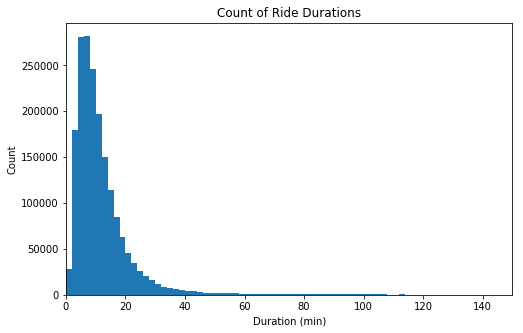

In [30]:
binsize = 2
bins = np.arange(0,BikeShare['duration_minutes'].max()+binsize, binsize)
plt.figure(figsize=[8,5])
plt.hist(data=BikeShare, x= 'duration_minutes', bins = bins);
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.xlim([0,150])
plt.title('Count of Ride Durations')
plt.show()

The above plot is pretty positively skewed and has a long tail, let's try plotting this on a log scale as well. If we take this for what it is, then it tells us a majority of the rides lasted from about 10-15 minutes.

In [31]:
np.log10(BikeShare['duration_minutes'].describe())

count    6.270381
mean     1.154983
std      1.596667
min      0.007179
25%      0.765917
50%      0.966924
75%      1.162365
max      3.158192
Name: duration_minutes, dtype: float64

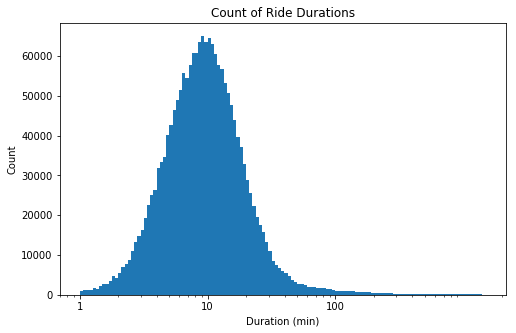

In [32]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(BikeShare['duration_minutes'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = BikeShare, x = 'duration_minutes', bins = bins)
plt.xscale('log')
plt.xticks([1,10,100],['1','10','100'])
plt.xlabel('Duration (min)')
plt.title('Count of Ride Durations')
plt.ylabel('Count')
plt.show()

On a more lograthmic scale we see that a lot of our values peak at the 10 mark, which is the value in the middle. In fact, there seems to be a large concentration of values in the range of 8-12 and then it starts to taper off the closer we get to the 100 minute mark.

In [33]:
BikeShare['duration_minutes'].describe()

count    1.863721e+06
mean     1.428838e+01
std      3.950631e+01
min      1.016667e+00
25%      5.833333e+00
50%      9.266667e+00
75%      1.453333e+01
max      1.439433e+03
Name: duration_minutes, dtype: float64

Next variable we'll look at is age.

In [34]:
BikeShare['Age'].describe()

count    1.753003e+06
mean     3.491204e+01
std      1.044289e+01
min      1.800000e+01
25%      2.700000e+01
50%      3.300000e+01
75%      4.000000e+01
max      1.370000e+02
Name: Age, dtype: float64

Right off the bat we can see an outlier with the value of 137 years old. Either some lucky rider found the fountain of youth or they entered in their birth date incorrectly. Let's get a better idea of which ages we can filter out by evaluating a boxplot of our values.

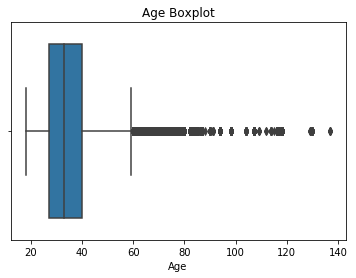

In [35]:
sb.boxplot(data = BikeShare, x='Age')
plt.title('Age Boxplot');

As we can see in the above boxplot, many of our values fall within the 30-40, with our median at about 33. In terms of filtering out certain ages, it looks like anything above the 60 range are potential outliers. For the sake of our data evaluation, it might be best if we drop those from our dataset.

In [36]:
over_60 = (BikeShare['Age'] >= 60)

In [37]:
BikeShare = BikeShare.loc[-over_60,:]

The code above filters the data for Age values over 60 and then removes them from the dataset.

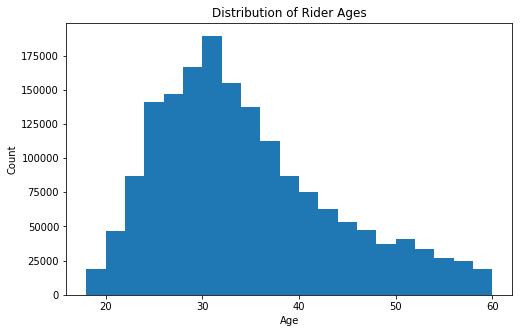

In [38]:
binsize = 2
bins = np.arange(18,BikeShare['Age'].max()+binsize, binsize)
plt.figure(figsize=[8,5])
plt.hist(data=BikeShare, x= 'Age', bins = bins);
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Rider Ages')
plt.show()

Here we have a better idea of what our distribution looks like. It seems that most of the riders are those in the 20s-40s range, while much older rides in the 60+ range are the minority. Overall, we have a good idea of what Ages we are working with here based on specific values, but for my analysis I would also like to get an aggregate look at this metric by putting these ages into Age Range groupings.

### Warning: This code will take a long time to run since it iterates over each row in the dataset

In [39]:
Age_Ranges = []

for i, row in BikeShare.iterrows():
    if row['Age'] > 10 and row['Age'] <= 20:
        Age_Ranges.append('10-20')
    elif row['Age'] > 20 and row['Age'] <= 30:
        Age_Ranges.append('20-30')
    elif row['Age'] > 30 and row['Age'] <= 40:
        Age_Ranges.append('30-40')
    elif row['Age'] > 40 and row['Age'] <= 50:
        Age_Ranges.append('40-50')
    elif row['Age'] > 50 and row['Age'] <= 60:
        Age_Ranges.append('50-60')
    else:
        Age_Ranges.append('None')


The above code loops through the DataFrame and will add a value to the Age_Ranges list depending on the criteria of what age range the age in Age column falls in.

In [40]:
Age_Ranges

['30-40',
 'None',
 '20-30',
 'None',
 '20-30',
 'None',
 '20-30',
 '30-40',
 '30-40',
 '20-30',
 'None',
 '20-30',
 '40-50',
 '40-50',
 '50-60',
 '40-50',
 '20-30',
 'None',
 '20-30',
 '20-30',
 '30-40',
 '40-50',
 '40-50',
 '30-40',
 '20-30',
 '20-30',
 '30-40',
 '20-30',
 '20-30',
 '30-40',
 '20-30',
 '30-40',
 '20-30',
 '20-30',
 '30-40',
 '40-50',
 '20-30',
 '20-30',
 '30-40',
 '40-50',
 '20-30',
 '30-40',
 '20-30',
 '30-40',
 '20-30',
 '20-30',
 '20-30',
 '30-40',
 '30-40',
 '50-60',
 '30-40',
 '20-30',
 '40-50',
 '40-50',
 '40-50',
 '20-30',
 '10-20',
 '20-30',
 'None',
 '30-40',
 '30-40',
 '20-30',
 'None',
 'None',
 '20-30',
 '20-30',
 '40-50',
 '40-50',
 '30-40',
 '20-30',
 '30-40',
 '30-40',
 '30-40',
 '20-30',
 '40-50',
 '20-30',
 '20-30',
 'None',
 '20-30',
 '40-50',
 '30-40',
 '50-60',
 '30-40',
 '20-30',
 '20-30',
 '30-40',
 '20-30',
 '20-30',
 '30-40',
 '20-30',
 '30-40',
 'None',
 '20-30',
 '30-40',
 '20-30',
 '30-40',
 '40-50',
 '30-40',
 '20-30',
 '30-40',
 '10-20',


Looks like we ended up with some Age range values that are classified as None, which means that they are NaN in our dataset. We'll create a new column with this list in the BikeShare dataframe and then remove those None rows.

In [41]:
BikeShare['Age_Range'] = Age_Ranges

In [42]:
BikeShare.sample(10)

,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,start_month#,start_monthName,start_hour,weekday,weekday_name,duration_minutes,Age,Start/End,Age_Range
360904,2018-04-21 01:15:01.480,2018-04-21 02:11:01.901,15.0,San Francisco Ferry Building (Harry Bridges Pl...,15.0,San Francisco Ferry Building (Harry Bridges Pl...,93,Customer,Male,No,4,April,1,5,Saturday,56.000000,21.0,San Francisco Ferry Building (Harry Bridges Pl...,20-30
1755462,2018-12-23 00:54:43.361,2018-12-23 01:10:55.257,34.0,Father Alfred E Boeddeker Park,122.0,19th St at Mission St,4824,Subscriber,Female,No,12,December,0,6,Sunday,16.183333,31.0,Father Alfred E Boeddeker Park to 19th St at M...,30-40
1244545,2018-09-25 17:38:53.632,2018-09-25 17:45:34.440,81.0,Berry St at 4th St,89.0,Division St at Potrero Ave,2980,Subscriber,Male,No,9,September,17,1,Tuesday,6.666667,24.0,Berry St at 4th St to Division St at Potrero Ave,20-30
101445,2018-02-27 13:03:37.024,2018-02-27 13:07:07.342,138.0,Jersey St at Church St,145.0,29th St at Church St,2052,Subscriber,Female,No,2,February,13,1,Tuesday,3.500000,42.0,Jersey St at Church St to 29th St at Church St,40-50
757608,2018-06-11 08:36:28.346,2018-06-11 08:42:09.706,21.0,Montgomery St BART Station (Market St at 2nd St),343.0,Bryant St at 2nd St,2754,Subscriber,Male,No,6,June,8,0,Monday,5.683333,27.0,Montgomery St BART Station (Market St at 2nd S...,20-30
455100,2018-05-30 11:46:51.414,2018-05-30 11:49:56.283,123.0,Folsom St at 19th St,122.0,19th St at Mission St,2894,Subscriber,Male,No,5,May,11,2,Wednesday,3.066667,51.0,Folsom St at 19th St to 19th St at Mission St,50-60
1207809,2018-08-01 11:19:43.950,2018-08-01 11:25:40.335,19.0,Post St at Kearny St,343.0,Bryant St at 2nd St,1938,Subscriber,Female,No,8,August,11,2,Wednesday,5.933333,29.0,Post St at Kearny St to Bryant St at 2nd St,20-30
157035,2018-02-12 07:57:14.273,2018-02-12 08:10:00.562,30.0,San Francisco Caltrain (Townsend St at 4th St),19.0,Post St at Kearny St,674,Subscriber,Male,No,2,February,7,0,Monday,12.766667,51.0,San Francisco Caltrain (Townsend St at 4th St)...,50-60
109868,2018-02-24 14:00:00.362,2018-02-24 14:07:10.606,308.0,San Pedro Square,316.0,San Salvador St at 1st St,127,Subscriber,Male,Yes,2,February,14,5,Saturday,7.166667,32.0,San Pedro Square to San Salvador St at 1st St,30-40
254443,2018-03-18 18:55:42.153,2018-03-18 19:01:36.571,81.0,Berry St at 4th St,284.0,Yerba Buena Center for the Arts (Howard St at ...,1660,Subscriber,Male,No,3,March,18,6,Sunday,5.900000,30.0,Berry St at 4th St to Yerba Buena Center for t...,20-30


In [43]:
NaN_AR = (BikeShare['Age_Range'] == 'None')

Search for rows with None value in the Age_Range column

In [44]:
BikeShare = BikeShare.loc[-NaN_AR,:]
BikeShare.shape

(1708250, 19)

Went from 1,863,721 to 1,708,205 rows in our dataset

In [45]:
AR = {'Age_Range': ['10-20','20-30','30-40','40-50','50-60']}

for var in AR:
    ordered_AR = pd.api.types.CategoricalDtype(ordered = True, categories = AR[var])
    BikeShare[var] = BikeShare[var].astype(ordered_AR)

Convert column to category and establish an order for the values in the column.

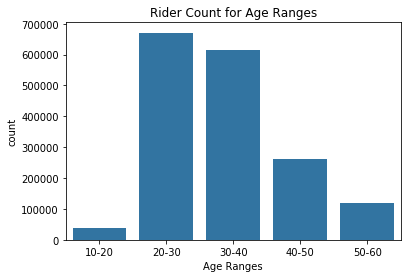

In [46]:
default_color = sb.color_palette()[0]
sb.countplot(data=BikeShare,x='Age_Range', color= default_color)
plt.title('Rider Count for Age Ranges')
plt.xlabel('Age Ranges');

Aggregate look at age ranges shows similar results as before. Majority of riders are in the 20-30 and 30-40 range, with it tapering off the older the rider gets.

### 2. Time Measure Exploration (Start Hour, Day of Week, Month)

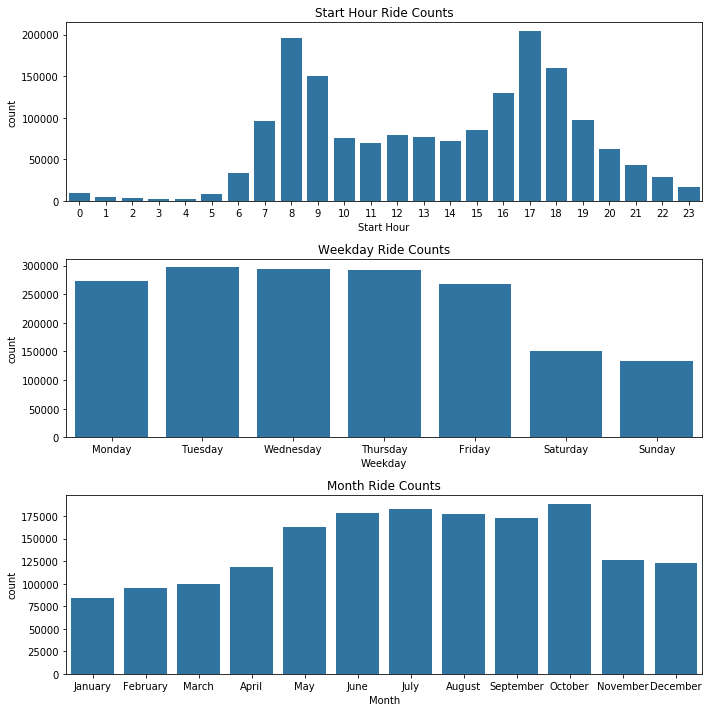

In [47]:
default_color = sb.color_palette()[0]

plt.figure(figsize=[10,10])

#Subplot 1 for Start Hour Count
plt.subplot(3,1,1)
sb.countplot(data = BikeShare, x = 'start_hour', color = default_color)
plt.title('Start Hour Ride Counts')
plt.xlabel('Start Hour');

#Subplot 2 for Weekday Ride Count
plt.subplot(3,1,2)
sb.countplot(data = BikeShare, x = 'weekday_name', color = default_color)
plt.title('Weekday Ride Counts')
plt.xlabel('Weekday');

#Subplot 3 for Month Ride Count
plt.subplot(3,1,3)
sb.countplot(data = BikeShare, x = 'start_monthName', color = default_color)
plt.title('Month Ride Counts')
plt.xlabel('Month')
plt.tight_layout();


Most popular time to ride seems to be in the mornings and close to night. Most people use these bikes during the weekdays instead of the weekend. On a month-to-month basis, we can see that it was the later middle-half of the year where people used those bikes the most.

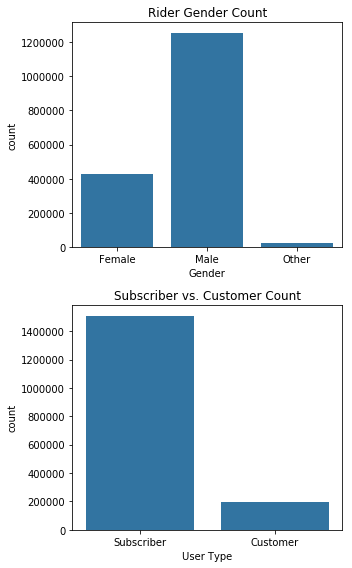

In [48]:
plt.figure(figsize=[5,8])
plt.subplot(2,1,1)
sb.countplot(data = BikeShare, x = 'member_gender', color = default_color)
plt.title('Rider Gender Count')
plt.xlabel('Gender');

plt.subplot(2,1,2)
sb.countplot(data = BikeShare, x = 'user_type', color = default_color)
plt.title('Subscriber vs. Customer Count')
plt.xlabel('User Type')
plt.tight_layout();

For gender counts, a large portion of riders were male as opposed to female or other. The same case can be made for User Type, where we can see that more than 75% of riders were subscribers. Next, we're going to take a look at our popular Start/End Stations.

### 3. Start and End Stations

I'd like to take a look at the top 10 most popular combinations of Start/End stations. The plan will be to establish a dataframe of just those 10 stations and to then analyze it further in the bivariate analysis.

In [49]:
BikeShare['Start/End'].value_counts().nlargest(10)

San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St    5919
The Embarcadero at Sansome St to Steuart St at Market St                               4564
Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)               4085
Grand Ave at Perkins St to 19th Street BART Station                                    3811
19th Street BART Station to Grand Ave at Perkins St                                    3664
The Embarcadero at Sansome St to San Francisco Ferry Building (Harry Bridges Plaza)    3171
San Francisco Ferry Building (Harry Bridges Plaza) to Berry St at 4th St               3016
Steuart St at Market St to The Embarcadero at Sansome St                               2978
Bay Pl at Vernon St to 19th Street BART Station                                        2970
Townsend St at 7th St to San Francisco Caltrain Station 2  (Townsend St at 4th St)     2824
Name: Start/End, dtype: int64

In [50]:
SES = BikeShare[(BikeShare['Start/End'] == 'San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St')
                  | (BikeShare['Start/End'] == 'The Embarcadero at Sansome St to Steuart St at Market St')
                  | (BikeShare['Start/End'] == "Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)")
                  | (BikeShare['Start/End'] == 'Grand Ave at Perkins St to 19th Street BART Station')
                  | (BikeShare['Start/End'] == '19th Street BART Station to Grand Ave at Perkins St')
                  | (BikeShare['Start/End'] == 'The Embarcadero at Sansome St to San Francisco Ferry Building (Harry Bridges Plaza)')
                  | (BikeShare['Start/End'] == 'San Francisco Ferry Building (Harry Bridges Plaza) to Berry St at 4th St')
                  | (BikeShare['Start/End'] == 'Steuart St at Market St to The Embarcadero at Sansome St')
                  | (BikeShare['Start/End'] == 'Bay Pl at Vernon St to 19th Street BART Station')
                  | (BikeShare['Start/End'] == 'Townsend St at 7th St to San Francisco Caltrain Station 2  (Townsend St at 4th St)')]

SES['Start/End'].value_counts()

San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St    5919
The Embarcadero at Sansome St to Steuart St at Market St                               4564
Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)               4085
Grand Ave at Perkins St to 19th Street BART Station                                    3811
19th Street BART Station to Grand Ave at Perkins St                                    3664
The Embarcadero at Sansome St to San Francisco Ferry Building (Harry Bridges Plaza)    3171
San Francisco Ferry Building (Harry Bridges Plaza) to Berry St at 4th St               3016
Steuart St at Market St to The Embarcadero at Sansome St                               2978
Bay Pl at Vernon St to 19th Street BART Station                                        2970
Townsend St at 7th St to San Francisco Caltrain Station 2  (Townsend St at 4th St)     2824
Name: Start/End, dtype: int64

Value counts for the 10 most popular Start/End stations.

In [51]:
SES.describe()

,start_station_id,end_station_id,bike_id,start_month#,start_hour,weekday,duration_minutes,Age
count,37002.000000,37002.000000,37002.000000,37002.000000,37002.000000,37002.000000,37002.000000,37002.000000
mean,75.835955,70.834982,2195.275445,6.530836,12.916923,2.349981,9.580845,35.685666
std,77.219130,76.279961,1244.191288,3.172267,4.554285,1.712725,22.185666,8.998979
min,6.000000,6.000000,11.000000,1.000000,0.000000,0.000000,2.200000,18.000000
25%,15.000000,15.000000,1150.000000,4.000000,8.000000,1.000000,5.233333,29.000000
50%,16.000000,16.000000,2240.000000,7.000000,13.000000,2.000000,6.533333,34.000000
75%,182.000000,182.000000,3206.000000,9.000000,17.000000,4.000000,9.650000,41.000000
max,196.000000,196.000000,5577.000000,12.000000,23.000000,6.000000,1247.216667,59.000000


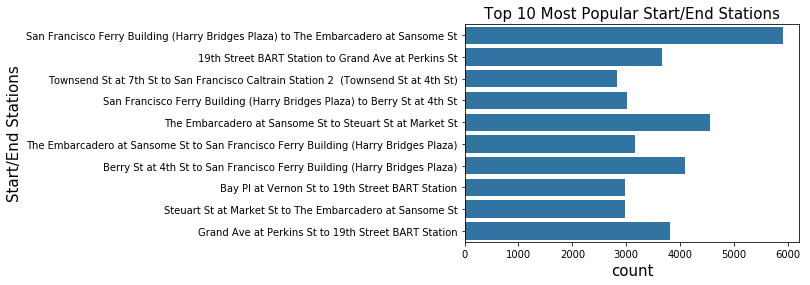

In [52]:
sb.countplot(data=SES,y='Start/End', color=default_color)
plt.title('Top 10 Most Popular Start/End Stations', size =15)
plt.ylabel('Start/End Stations', size=15)
plt.xlabel('count',size=15);

Of the most popular Start/End stations, the one that wins out is the San Francisco Ferry Building (Harry Bridges Plaza) to the Embarcadero at Sansome St. Because this business was started in San Francisco, it does kinda make sense that the most used station comination is one located there.

The names for these Start/End combinations are quite long, we are going to rename these to be shorter for the sake of our future graphs' readability.

In [53]:
SES.loc[SES['Start/End'] == 'San Francisco Ferry Building (Harry Bridges Plaza) to The Embarcadero at Sansome St',
        'Start/End'] = 'R1 SFFB to E at SS'
SES.loc[SES['Start/End'] == 'The Embarcadero at Sansome St to Steuart St at Market St', 
        'Start/End'] = 'R2 E at SS to StSt at MktSt'
SES.loc[SES['Start/End'] == 'Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza)',
        'Start/End'] = 'R3 BS at 4th to SFFB'
SES.loc[SES['Start/End'] == 'Grand Ave at Perkins St to 19th Street BART Station',
        'Start/End'] = 'R4 G at PkSt to 19thSt Bt'
SES.loc[SES['Start/End'] == '19th Street BART Station to Grand Ave at Perkins St',
        'Start/End'] = 'R5 19thSt Bt to G at PkSt'
SES.loc[SES['Start/End'] == 'The Embarcadero at Sansome St to San Francisco Ferry Building (Harry Bridges Plaza)', 
        'Start/End'] = 'R6 E at SS to SFFB'
SES.loc[SES['Start/End'] == 'San Francisco Ferry Building (Harry Bridges Plaza) to Berry St at 4th St',
        'Start/End'] = 'R7 SFFB to BS at 4th'
SES.loc[SES['Start/End'] == 'Steuart St at Market St to The Embarcadero at Sansome St',
        'Start/End'] = 'R8 StSt at MktSt to E at SS'
SES.loc[SES['Start/End'] == 'Bay Pl at Vernon St to 19th Street BART Station',
        'Start/End'] = 'R9 BP at VSt to 19thSt Bt'
SES.loc[SES['Start/End'] == "Townsend St at 7th St to San Francisco Caltrain Station 2  (Townsend St at 4th St)",
        'Start/End'] = 'R10 TwSt at 7th to SFCS2'

C:\Users\MJohnson1\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [54]:
SES['Start/End'].value_counts()


R1 SFFB to E at SS             5919
R2 E at SS to StSt at MktSt    4564
R3 BS at 4th to SFFB           4085
R4 G at PkSt to 19thSt Bt      3811
R5 19thSt Bt to G at PkSt      3664
R6 E at SS to SFFB             3171
R7 SFFB to BS at 4th           3016
R8 StSt at MktSt to E at SS    2978
R9 BP at VSt to 19thSt Bt      2970
R10 TwSt at 7th to SFCS2       2824
Name: Start/End, dtype: int64

In [55]:
ord_SE = {'Start/End': ['R1 SFFB to E at SS','R2 E at SS to StSt at MktSt','R3 BS at 4th to SFFB',
                                  'R4 G at PkSt to 19thSt Bt','R5 19thSt Bt to G at PkSt',
                                  'R6 E at SS to SFFB','R7 SFFB to BS at 4th','R8 StSt at MktSt to E at SS',
                                  'R9 BP at VSt to 19thSt Bt',
                                        'R10 TwSt at 7th to SFCS2']}
for var in ord_SE:
    ord_SE = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ord_SE[var])
    SES[var] = SES[var].astype(ord_SE)

C:\Users\MJohnson1\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


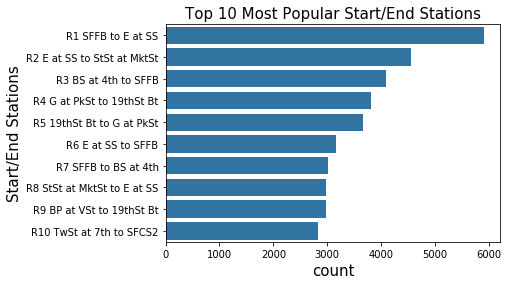

In [56]:
sb.countplot(data=SES,y='Start/End', color=default_color)
plt.title('Top 10 Most Popular Start/End Stations', size =15)
plt.ylabel('Start/End Stations', size=15)
plt.xlabel('count',size=15);

Ordered the stations in terms of Rank.

In [57]:
SES.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37002 entries, 30 to 1863504
Data columns (total 19 columns):
start_time                 37002 non-null datetime64[ns]
end_time                   37002 non-null datetime64[ns]
start_station_id           37002 non-null float64
start_station_name         37002 non-null category
end_station_id             37002 non-null float64
end_station_name           37002 non-null category
bike_id                    37002 non-null int64
user_type                  37002 non-null object
member_gender              37002 non-null category
bike_share_for_all_trip    37002 non-null object
start_month#               37002 non-null int64
start_monthName            37002 non-null category
start_hour                 37002 non-null int64
weekday                    37002 non-null int64
weekday_name               37002 non-null category
duration_minutes           37002 non-null float64
Age                        37002 non-null float64
Start/End                  37

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Our measures of time looked to be alright. Most of them are categorical and did not have anything that stood out as odd. As stated before, in the morning and later in the evening were the more popular times to ride along with the weekdays being more popular and the June-October months taking the lion's share of rides.

Start/End station distributions looked okay as well. One station in particular is leagues more popular than the others.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
For duration of the ride in minutes, graphing it normally caused it to take on a positive skew, making it harder to read the results. A log transformation was necessary in order to get a better read on the data. Also there were some egregious numbers in there that went above the 3 hour mark. I filtered out the data and transformed the graphs. Overall, from what I can tell, a large amount of rides fell under the 10 minute mark.

The other feature that had a strange distribution of data was age. There were many outliers that had to be removed (such as ages being over 100). Other than that, the graph didn't require too much transformation. Essentially most riders seem to be in their late 20s to early 30s. Many of the riders were subscribers and a majority identify as male. Lastly we looked at time of year and found that the most popular month for rides was in October and that most people rode in the middle to later months of the year rather than the start. Also, the creation of a new column with age ranges was done for the sake of aggregation and more macro view of the data.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).


In [58]:
BikeShare.columns

Index(['start_time', 'end_time', 'start_station_id', 'start_station_name',
       'end_station_id', 'end_station_name', 'bike_id', 'user_type',
       'member_gender', 'bike_share_for_all_trip', 'start_month#',
       'start_monthName', 'start_hour', 'weekday', 'weekday_name',
       'duration_minutes', 'Age', 'Start/End', 'Age_Range'],
      dtype='object')

### 1. Pairwise Relationships between time of day/day/month and user types.

#### Start hour vs. Age/Gender/User Type
Below we will be using heatmaps to show relationships for these variables. Reason being is that if I do a clustered barplot, it will be hard to read since it will create bars for each start hour (24 total).

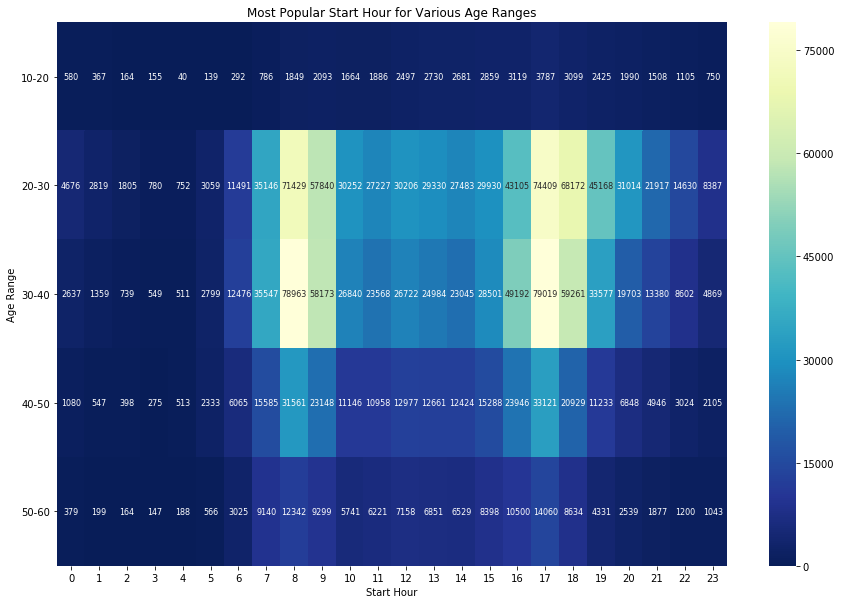

In [59]:
ct_counts = BikeShare.groupby(['start_hour', 'Age_Range']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'Age_Range', columns = 'start_hour', values = 'count')
plt.figure(figsize=(15,10))
sb.heatmap(ct_counts, annot = True, fmt='d',cmap='YlGnBu_r', annot_kws={"size": 8})
plt.title('Most Popular Start Hour for Various Age Ranges')
plt.xlabel('Start Hour')
plt.ylabel('Age Range')
plt.yticks(rotation=360);

Before when we looked at Age Range on it's own, we found that most fell in the 20-30 and 30-40 range. Here we can see that those same age ranges both seem to either start their rides at 8 or 9AM and 5 or 6PM. One interesting thing is that if we look at the 10-20 range, their most popular time to start riding a bike is around the afternoon time (12pm onwards), the same can even be said for those in the 50-60 range.

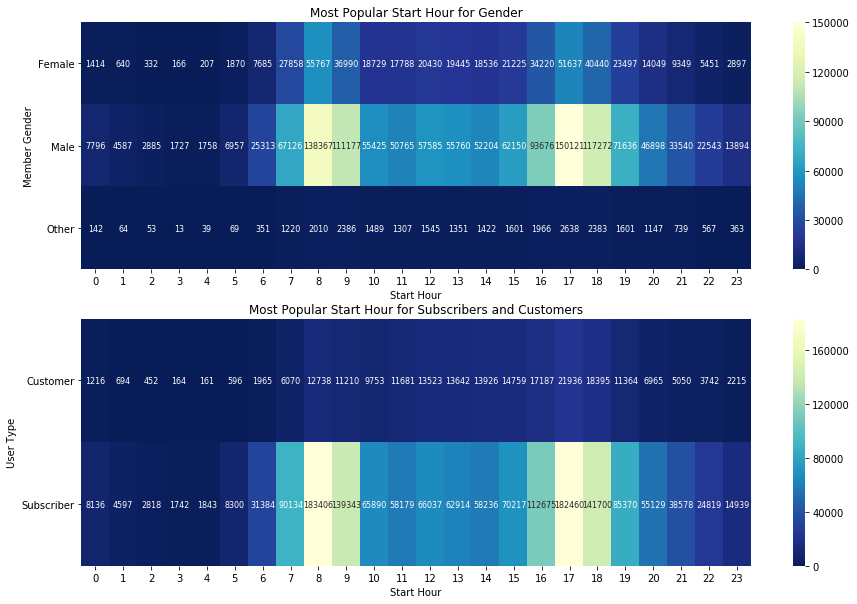

In [60]:
#Creation of 2 subplots for User Type and Gender
plt.figure(figsize=[15,10])

#subplot 1: start hour vs. gender
plt.subplot(2,1,1)
ct_counts1 = BikeShare.groupby(['start_hour', 'member_gender']).size()
ct_counts1 = ct_counts1.reset_index(name = 'count')
ct_counts1 = ct_counts1.pivot(index = 'member_gender', columns = 'start_hour', values = 'count')
sb.heatmap(ct_counts1, annot = True, fmt='d',cmap='YlGnBu_r', annot_kws={"size": 8})
plt.title('Most Popular Start Hour for Gender')
plt.xlabel('Start Hour')
plt.ylabel('Member Gender')
plt.yticks(rotation=360);

#subplot 2: start hour vs. user type
plt.subplot(2,1,2)
ct_counts2 = BikeShare.groupby(['start_hour', 'user_type']).size()
ct_counts2 = ct_counts2.reset_index(name = 'count')
ct_counts2 = ct_counts2.pivot(index = 'user_type', columns = 'start_hour', values = 'count')
sb.heatmap(ct_counts2, annot = True, fmt='d',cmap='YlGnBu_r', annot_kws={"size": 8})
plt.title('Most Popular Start Hour for Subscribers and Customers')
plt.xlabel('Start Hour')
plt.ylabel('User Type')
plt.yticks(rotation=360);

Similar to the previous plot with Age Ranges, all genders look to start riding around the same time (in the morning from 8-9 and later in the evening from 5-6). Our plot for User Types tells a slightly different story. While Subscribers will typically start riding at similar times (8-9am and later from 5-6), the time where customers start riding the most is primarily in the after noon (from 4-6pm). The runner up in time ranges for Customers is also starting in the afternoon from the 12pm mark on.

#### Weekday vs. Age/Gender/User Type
Clustered bar charts will be employed here since we only need to work with 7 categories.

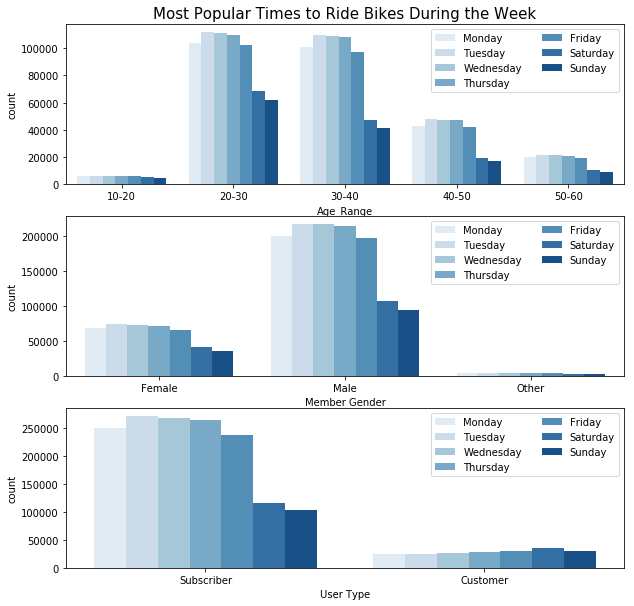

In [61]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10,10])

# subplot 1: Age Range vs. Weekday Name
plt.subplot(3, 1, 1)
sb.countplot(data = BikeShare, x = 'Age_Range', hue = 'weekday_name', palette = 'Blues')
plt.legend(ncol = 2)
plt.title('Most Popular Times to Ride Bikes During the Week', size = 15)

# subplot 2: Member Gender vs. Weekday Name
ax = plt.subplot(3, 1, 2)
sb.countplot(data = BikeShare, x = 'member_gender', hue = 'weekday_name', palette = 'Blues')
ax.legend(ncol = 2)
plt.xlabel('Member Gender')

#subplot 3: User Type vs. Weekday Name
ax2 = plt.subplot(3,1,3)
sb.countplot(data = BikeShare, x = 'user_type', hue = 'weekday_name', palette = 'Blues')
ax2.legend(ncol = 2)
plt.xlabel('User Type')

plt.show()

- Age: Pretty standard. For all age groups the predominant time to ride these bikes are on the weekdays rather than the weekend.

- Member Gender: All genders mostly ride during the week rather than on the weekends.

- User Type: There is a notable difference here. Subscribers mostly ride during the week rather than the weekdends. But, it looks like customers prefer to ride on the weekends rater than the weekdays.


#### Month vs. Age/Gender/User Type

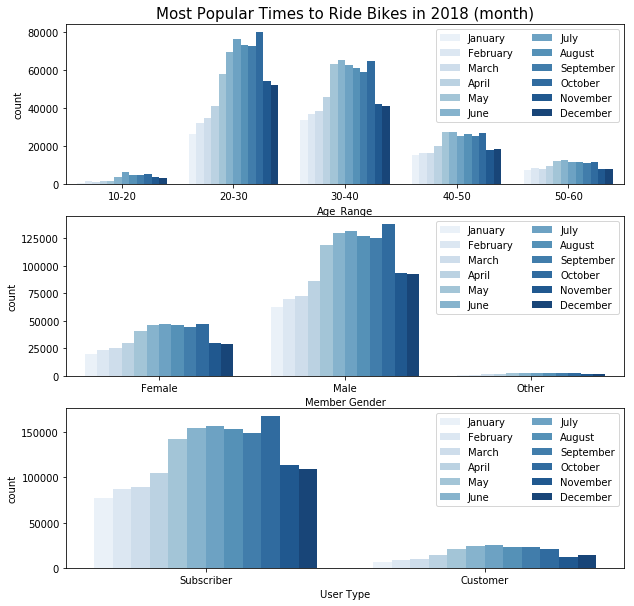

In [62]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [10,10])

# subplot 1: Age Range vs. Month Name
plt.subplot(3, 1, 1)
sb.countplot(data = BikeShare, x = 'Age_Range', hue = 'start_monthName', palette = 'Blues')
plt.legend(ncol = 2)
plt.title("Most Popular Times to Ride Bikes in 2018 (month)", size = 15)

# subplot 2: Member Gender vs. Month Name
ax = plt.subplot(3, 1, 2)
sb.countplot(data = BikeShare, x = 'member_gender', hue = 'start_monthName', palette = 'Blues')
ax.legend(ncol = 2)
plt.xlabel('Member Gender')

#subplot 3: User Type vs. Month Name
ax2 = plt.subplot(3,1,3)
sb.countplot(data = BikeShare, x = 'user_type', hue = 'start_monthName', palette = 'Blues')
ax2.legend(ncol = 2)
plt.xlabel('User Type')

plt.show()

- Age: 10-20 range, the most popular time to ride was in June while it was October for the 20-30 and 30-40 groups. May and June for the 40-50 and 50-60 groups.

- Gender: October was the most popular month for Male and Female. Other looks to be pretty evenly distributed.

- User Type: October for Subcribers and June/July for Customers were the most popular months for riding.

### 2. Pairwise relationships for Duration and Start/End Stations

In [63]:
AD_Sub = BikeShare[BikeShare['user_type'] == 'Subscriber']
AD_Cust = BikeShare[BikeShare['user_type'] == 'Customer']

In [64]:
AD_Sub.user_type.value_counts()

Subscriber    1508846
Name: user_type, dtype: int64

#### Duration and Start/End

In [65]:
SES['duration_minutes'].describe()

count    37002.000000
mean         9.580845
std         22.185666
min          2.200000
25%          5.233333
50%          6.533333
75%          9.650000
max       1247.216667
Name: duration_minutes, dtype: float64

Because 75% of our data is under the value of 10, we are going to get rid of the large we have here.

In [66]:
SES_f =  SES[SES['duration_minutes'] < 20]

In [67]:
SES_f.duration_minutes.describe()

count    35232.000000
mean         7.341163
std          3.132942
min          2.200000
25%          5.183333
50%          6.400000
75%          8.983333
max         19.983333
Name: duration_minutes, dtype: float64

Filtered dataframe for values of duration under 20 minutes

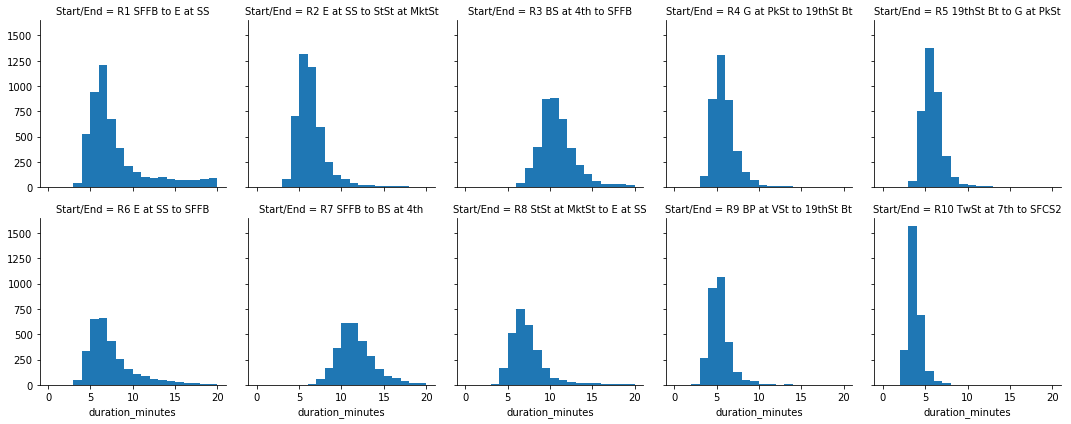

In [68]:
bin_edges = np.arange(0, SES_f['duration_minutes'].max()+1, 1)
g = sb.FacetGrid(data = SES, col = 'Start/End', col_wrap=5)
g.map(plt.hist, "duration_minutes", bins = bin_edges);

While most of the durations for these stations are about 5-10 minutes, we do have some variance. For example, there's one station where 10 minutes was the most common time for duration, while another is even closer to the 15 minute mark.

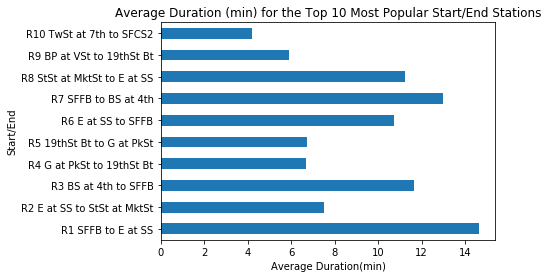

In [69]:
SES.groupby('Start/End')['duration_minutes'].mean().plot(kind='barh', color = default_color)
plt.xlabel('Average Duration(min)')
plt.ylabel('Start/End')
plt.title('Average Duration (min) for the Top 10 Most Popular Start/End Stations');

On average, the number 1 ranked Start/End station in terms of useage also has the highest average duration.

#### Average Duration for Subscribers vs. Customers

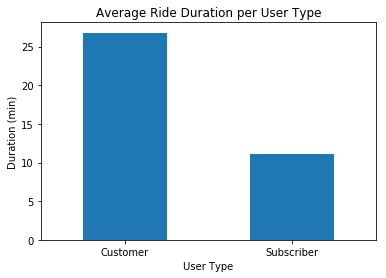

In [70]:
BikeShare.groupby('user_type')['duration_minutes'].mean().plot(kind='bar', color = default_color)
plt.title('Average Ride Duration per User Type')
plt.xticks(rotation=360)
plt.ylabel('Duration (min)')
plt.xlabel('User Type');

Even though we found there to be a larger amount of subscribers than customers in the Univariate exploration, our result here is surprising in that customers rode for a longer duration on average than subscribers.

#### Start/End Station vs. User Types

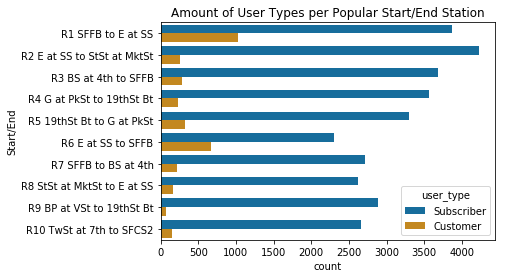

In [71]:
sb.countplot(data=SES_f, y='Start/End',hue='user_type',palette='colorblind')
plt.title('Amount of User Types per Popular Start/End Station');

Just a quick comparison of the amount of each user recorded for the top 10 popular start/end stations. Nothing too shocking here except that the second most popular Start/End station for Customers was ranked 6th in popularity.

#### Average Duration for Gender

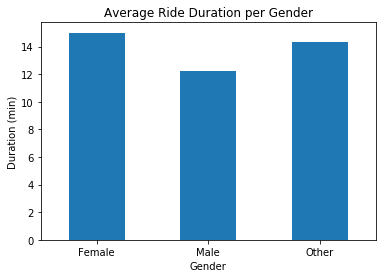

In [72]:
BikeShare.groupby('member_gender')['duration_minutes'].mean().plot(kind='bar', color = default_color)
plt.title('Average Ride Duration per Gender')
plt.xticks(rotation=360)
plt.ylabel('Duration (min)')
plt.xlabel('Gender');

Women and those in the other category rode longer on average than men.

#### Gender and Start/End Station

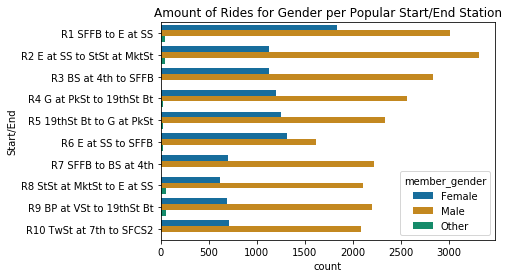

In [73]:
sb.countplot(data=SES_f, y='Start/End',hue='member_gender',palette='colorblind')
plt.title('Amount of Rides for Gender per Popular Start/End Station');

Other have very little represenation on this graph, so it's hard to gauge their metrics. For men and women, both seem to have similar preference. One thing that is interesting is that, just like customers in the previous graph, women's second most used Start/End station is ranked 6th in the top 10.

#### Gender and user Type
Seeing the similarity in Station choice between customers and women has sparked me to want to look into the distribution of gender per user type.

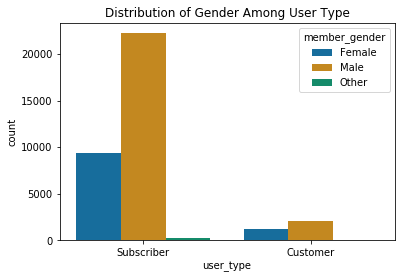

In [74]:
sb.countplot(data=SES_f,x='user_type',hue='member_gender',palette='colorblind')
plt.title('Distribution of Gender Among User Type');

There were more males in both categories, but even so the numbers for women appear to be closer to men's in the customer category. Other has small numbers, so again it's hard to get a good gauge on its metrics.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
1. Time
Some very interesting observations in this prompt. We found that most people tend to like riding these bikes at either 8-9am or in the evening around 5-6. However,the variation here comes in when we factor in Subscribers vs. Customers. Customers tend to go against the grain in that they ride more during the weekends and in the afternoon to evening times. More even rode thier bikes during the middle months of the year when the other variables of interest were during October.

2. Duration and Start/End
While some station combinations were different, for the most part rides often fell in the 5-10 minute range. Averaging out duration per the top 10 stations produced the same results. One other thing that was interesting was that Customers were found to ride their bikes longer on average than Subcribers. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
When comparing user types with popular Start/End stations, it was interesting to see that the second most popular Start/End station for Customers was ranked 6th popular overall. That goes for women as well, they followed a similar trend to customers in that their second most chosen Start/End station was also ranked 6th. What's even more interesting is that male makes up a larger portion of the customer base, so even with the smaller number for females, they followed that same trend as customers for favored Start/End station.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 1. Multivariate look at time of day/day/Month and Age/Gender/User Type
In the previous section I looked at the pairwise relationships between the above listed variables. Some interesting things I found were certain groups that went against the grain.

#### A look at the popular starting times for subscribers and customers in the 50-60 age group and 20-30 age groups.
Rationale: Subscriber and customers have noted differences in behavior already in terms of when they ride these bikes, as do those in the 50-60 age range vs those in the 20-30. Ideally, I want to delve further into these differences to see if anything else comes up by adding extra variables.

In [75]:
Subscriber2030_df = BikeShare[(BikeShare['user_type'] == 'Subscriber') & (BikeShare['Age'] >= 20) & (BikeShare['Age']<=30)]
Subscriber5060_df = BikeShare[(BikeShare['user_type'] == 'Subscriber') & (BikeShare['Age'] >= 50) & (BikeShare['Age']<=60)]


Created filtered dataframes for the two user types.

In [76]:
Subscriber2030_df.shape

(597630, 19)

In [77]:
Subscriber5060_df.shape

(133200, 19)

In [78]:
Subscribers_df = pd.concat([Subscriber2030_df, Subscriber5060_df], ignore_index=True)

In [79]:
Subscribers_df.shape

(730830, 19)

In [80]:
print(Subscribers_df.Age.value_counts())
print(Subscribers_df.user_type.value_counts())


30.0    88230
29.0    73767
28.0    71131
25.0    70142
27.0    67809
26.0    59673
24.0    54415
23.0    44777
22.0    29232
50.0    22405
21.0    22087
53.0    20072
20.0    16367
51.0    15054
55.0    13280
56.0    11689
57.0    11302
54.0    11135
52.0    10922
58.0     8899
59.0     8442
Name: Age, dtype: int64
Subscriber    730830
Name: user_type, dtype: int64


The above code created a DataFrame of only Subscribers with the requested Age Ranges of 20-30 and 50-60. We'll be doing the same with Customers below.

In [81]:
Customer2030_df = BikeShare[(BikeShare['user_type'] == 'Customer') & (BikeShare['Age'] >= 20) & (BikeShare['Age']<=30)]
Customer5060_df = BikeShare[(BikeShare['user_type'] == 'Customer') & (BikeShare['Age'] >= 50) & (BikeShare['Age']<=60)]

In [82]:
Customer2030_df.shape

(93224, 19)

In [83]:
Customer5060_df.shape

(11352, 19)

In [84]:
Customers_df = pd.concat([Customer2030_df, Customer5060_df], ignore_index=True)

In [85]:
Customers_df.shape

(104576, 19)

In [86]:
print(Customers_df.Age.value_counts())
print(Customers_df.user_type.value_counts())

30.0    14606
29.0    11063
28.0    10868
27.0    10022
26.0     9682
25.0     8560
24.0     7647
23.0     6767
22.0     5892
21.0     4657
20.0     3460
50.0     1616
51.0     1579
52.0     1442
53.0     1286
54.0     1272
55.0     1126
56.0      937
57.0      769
58.0      737
59.0      588
Name: Age, dtype: int64
Customer    104576
Name: user_type, dtype: int64


With both dataframes ready, we can now start looking at multivariate comparisons.

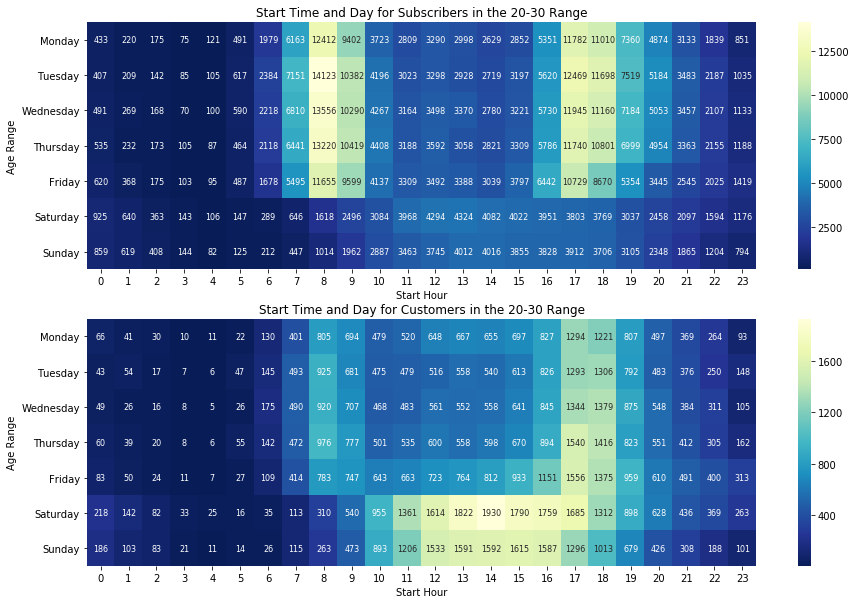

In [87]:
plt.figure(figsize=[15,10])

plt.subplot(2,1,1)
ct_counts4 = Subscriber2030_df.groupby(['start_hour', 'weekday_name']).size()
ct_counts4 = ct_counts4.reset_index(name = 'count')
ct_counts4 = ct_counts4.pivot(index = 'weekday_name', columns = 'start_hour', values = 'count')
sb.heatmap(ct_counts4, annot = True, fmt='d',cmap='YlGnBu_r', annot_kws={"size": 8})
plt.title('Start Time and Day for Subscribers in the 20-30 Range')
plt.xlabel('Start Hour')
plt.ylabel('Age Range')
plt.yticks(rotation=360);

plt.subplot(2,1,2)
ct_counts5 = Customer2030_df.groupby(['start_hour', 'weekday_name']).size()
ct_counts5 = ct_counts5.reset_index(name = 'count')
ct_counts5 = ct_counts5.pivot(index = 'weekday_name', columns = 'start_hour', values = 'count')
sb.heatmap(ct_counts5, annot = True, fmt='d',cmap='YlGnBu_r', annot_kws={"size": 8})
plt.title('Start Time and Day for Customers in the 20-30 Range')
plt.xlabel('Start Hour')
plt.ylabel('Age Range')
plt.yticks(rotation=360);

Looks like the most popular start time for Subscribers in the 20-30 Range is 8AM on a Tuesday. Looking at the points overall, we can further reinforce that subscribers prefer to bike more on the Weekdays and in the morning and evening time. For customers we get a nice difference here, where we can see that the most popular start time was 2pm on a Saturday. Overall, customers prefer to ride on the weekends aroudn the afternoon to evening time.

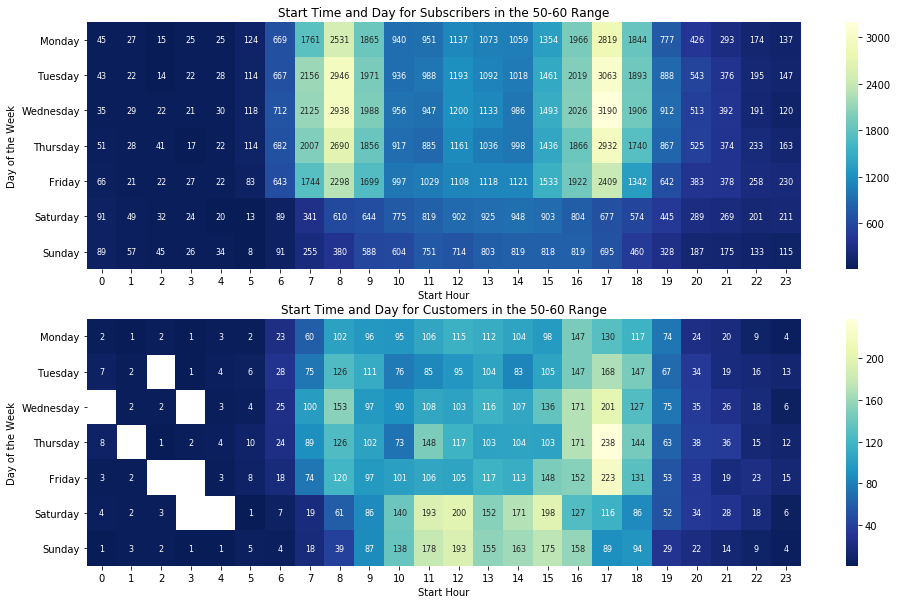

In [88]:
#Creation of 2 subplots for User Type and Gender
plt.figure(figsize=[16,10])

#subplot 1: start hour vs. gender
plt.subplot(2,1,1)
ct_counts6 = Subscriber5060_df.groupby(['start_hour', 'weekday_name']).size()
ct_counts6 = ct_counts6.reset_index(name = 'count')
ct_counts6 = ct_counts6.pivot(index = 'weekday_name', columns = 'start_hour', values = 'count')
sb.heatmap(ct_counts6, annot = True, fmt='d',cmap='YlGnBu_r', annot_kws={"size": 8})
plt.title('Start Time and Day for Subscribers in the 50-60 Range')
plt.xlabel('Start Hour')
plt.ylabel('Day of the Week')
plt.yticks(rotation=360);

#subplot 2: start hour vs. user type
plt.subplot(2,1,2)
ct_counts8 = Customer5060_df.groupby(['start_hour', 'weekday_name']).size()
ct_counts8 = ct_counts8.reset_index(name = 'count')
ct_counts8 = ct_counts8.pivot(index = 'weekday_name', columns = 'start_hour', values = 'count')
sb.heatmap(ct_counts8, annot = True, fmt='.3g',cmap='YlGnBu_r', annot_kws={"size": 8})
plt.title('Start Time and Day for Customers in the 50-60 Range')
plt.xlabel('Start Hour')
plt.ylabel('Day of the Week')
plt.yticks(rotation=360);

For Subscribers, there is not much of a difference between the 50-60 and 20-30 age ranges in terms of overall popular times. Both age groups prefer to ride in the mornings and afternoons on Weekdays. The only difference here is that the most popular day and time for Subscribers in the 50-60 range was 5pm on a Wednesday rather than a Tuesday. For customers, there is a noticeable difference thatn from customers in the 20-30 range. Customers in the 50-60 range seem to prefer riding the most on Thursday at 5pm. Older customers seem to ride mroe on the Weekdays as opposed to younger customers.

#### Most popular day and month to ride for Genders
Let's take a more macro look at our data and see if there was a difference in which days and months a specific gender chose to ride in.

In [89]:
BikeShare.member_gender.value_counts()

Male      1251162
Female     430622
Other       26466
Name: member_gender, dtype: int64

In [90]:
Fem_time = BikeShare[BikeShare['member_gender']=='Female']
Male_time = BikeShare[BikeShare['member_gender']=='Male']
Other_time = BikeShare[BikeShare['member_gender']=='Other']

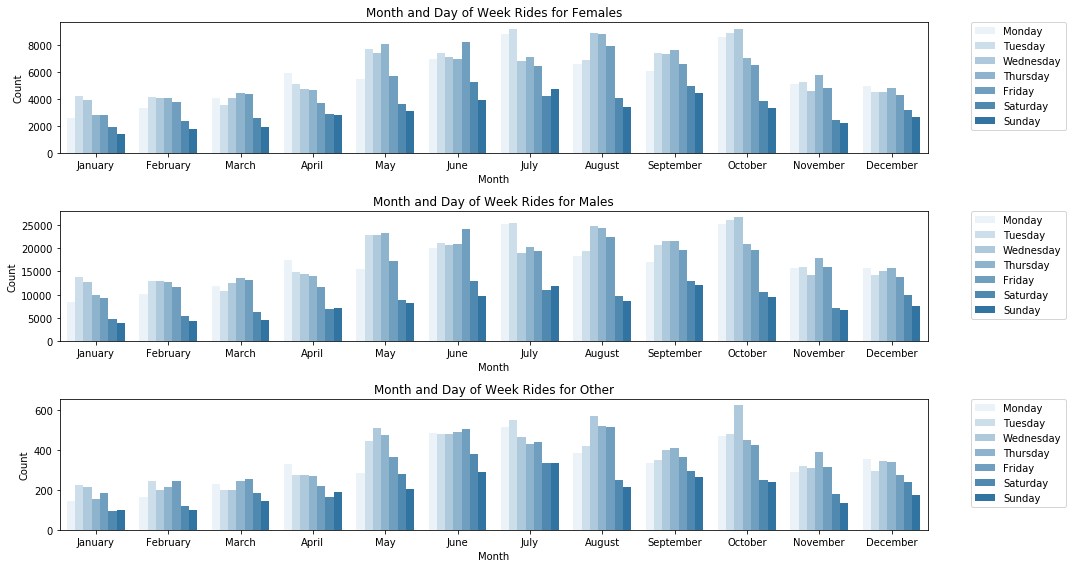

In [91]:
plt.figure(figsize=[15,8])

#Subplot 1: Female Ride times for Month and Day of the Week
plt.subplot(3,1,1)
sb.countplot(data=Fem_time, x='start_monthName',hue='weekday_name', color=default_color)
plt.title('Month and Day of Week Rides for Females')
plt.xlabel('Month')
plt.ylabel('Count')
plt.yticks(rotation=360)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout();

#Subplot 2: For Male
plt.subplot(3,1,2)
sb.countplot(data=Male_time, x='start_monthName',hue='weekday_name', color=default_color)
plt.title('Month and Day of Week Rides for Males')
plt.xlabel('Month')
plt.ylabel('Count')
plt.yticks(rotation=360)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout();

#Subplot 3: For Other
plt.subplot(3,1,3)
sb.countplot(data=Other_time, x='start_monthName',hue='weekday_name', color=default_color)
plt.title('Month and Day of Week Rides for Other')
plt.xlabel('Month')
plt.ylabel('Count')
plt.yticks(rotation=360)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout();

Females: Times where they rode the most was either a Tuesday in July or a Wednesday in October. Overall, most rides were cataloged during the May to October timeframe.

Males: Time where they rode the most was a Wednesday in October, similar to females. Other than that, July was also a month of many rides at the start of the week. They, too, preferred May-October for riding these bikes.

Other: Also on the train of riding the most during a Wednesday in October. Their second highest is a Wednesday in August, which is interesting since it seemed Male and Female leaned a little more towards Monday and Tuesday after their first highest ride count in October.

Overall: Nobody seemed to like riding during weekends, they were the least popular time.

### 2. Multivariate Relationships For Duration and Popular Start/End Stations
In the previous section we looked at User Type ride durations and which stations each type typically rode to and from. We know that customers typically ride for longer, so lets dive further into that by adding popular stations into the mix.

#### Customer vs. Subscriber Duration for Each of the Top 10 Popular Start/End Stations

C:\Users\MJohnson1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


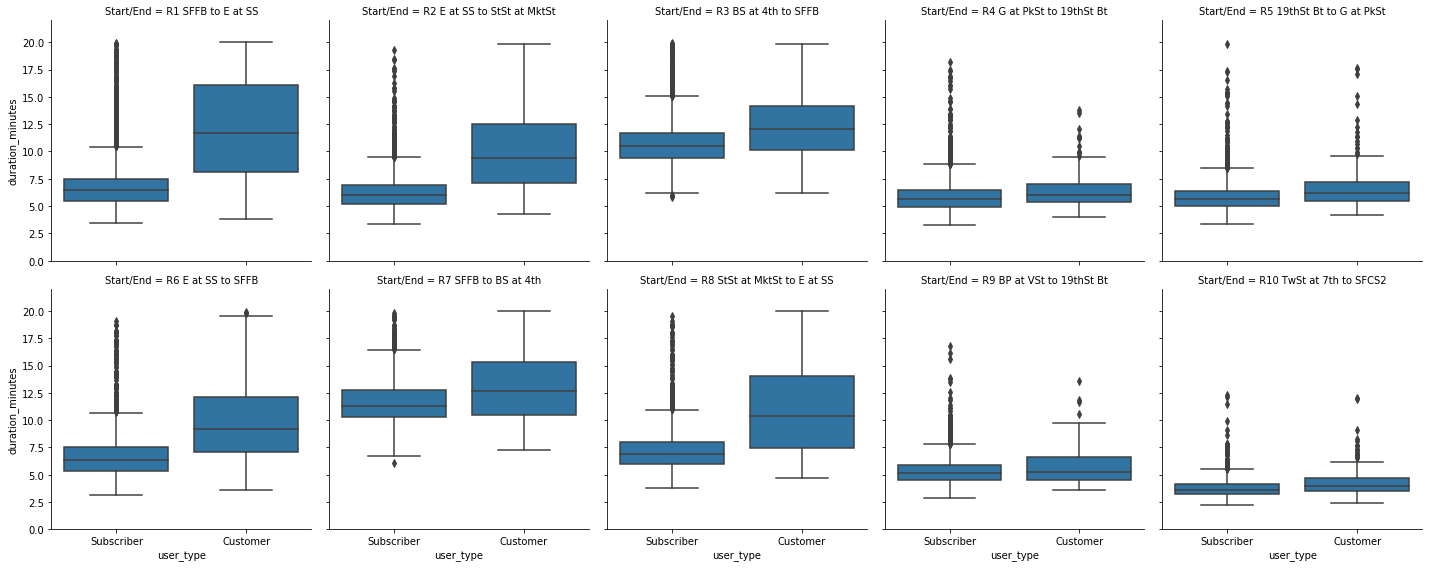

In [92]:
g = sb.FacetGrid(data=SES_f, col='Start/End',col_wrap=5,row_order=None,col_order=None, height = 4)
g.map(sb.boxplot,'user_type','duration_minutes')
plt.ylim([0,22]);

#### Duration of Ride for User Types of a Certain Gender

C:\Users\MJohnson1\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


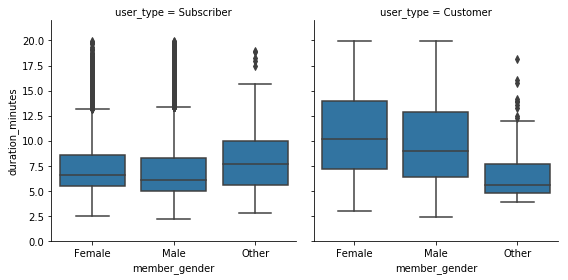

In [93]:
g = sb.FacetGrid(data=SES_f, col='user_type',row_order=None,col_order=None, height = 4)
g.map(sb.boxplot,'member_gender','duration_minutes')
plt.ylim([0,22]);

Overall, it looks like females rode for longer than males. However, Other did beat out both male and female in the subcriber category. Regardless, it looks like men tend to ride for shorter of the subcribers.

#### Top 10 Stations for User types of a Certain Gender
Before I noticed that Customers and Females followed a similar trend in their preference of the top 10 stations. I'd like to explore that further by comparing the overall trend of customers to that of femal customers.

In [94]:
Fem_SES = SES_f[(SES_f['member_gender'] == 'Female') & (SES_f['user_type'] == 'Customer')]
Male_SES = SES_f[(SES_f['member_gender'] == 'Male') & (SES_f['user_type'] == 'Customer')]
Other_SES = SES_f[(SES_f['member_gender'] == 'Other') & (SES_f['user_type'] == 'Customer')]
Customer_SES = SES_f[SES_f['user_type'] == 'Customer']

Created one dataframe of only women customers and one of just customers in general.

In [95]:
Fem_SES.member_gender.value_counts()

Female    1236
Other        0
Male         0
Name: member_gender, dtype: int64

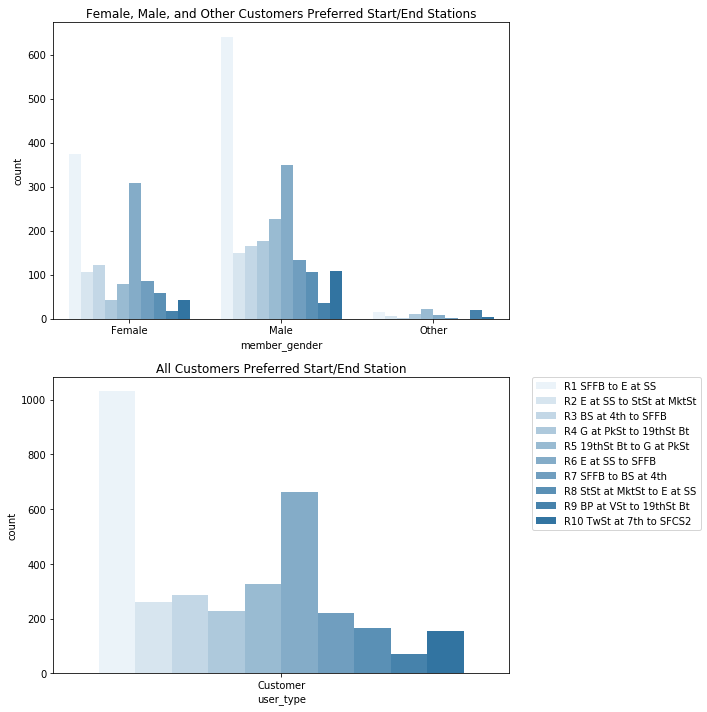

In [96]:
plt.figure(figsize = [6,6])

plt.subplot(2,1,1)
sb.countplot(data=Fem_SES, x='member_gender',hue='Start/End',color=default_color)
plt.title('Female, Male, and Other Customers Preferred Start/End Stations')

Male_Cust = sb.countplot(data=Male_SES, x='member_gender',hue='Start/End',color=default_color)
Male_Cust

Other_Cust = sb.countplot(data=Other_SES,x='member_gender',hue='Start/End',color=default_color)
Other_Cust
plt.gca().get_legend().remove()

plt.subplot(2,1,2)
sb.countplot(data=Customer_SES, x='user_type',hue='Start/End',color=default_color)
plt.title('All Customers Preferred Start/End Station')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout();

For customers, it's interesting to see that my initial thoughts were correct in that the gender that follows the same trend as customers the most is female. While males follow closely as well, they differ in regards to the 3rd and 4th ranked Start/End stations. Other are the ones that stray away from the overall trend of all customers the most.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
1. We got to explore further into the biking habits of Subscribers and Customers. It seems our thoughts in the bivariate analysis are further strengthened even with the addition of Age. We can see that Subscribers (even regardless of age) prefer to ride more in the mornings and in the evening. Whereas again, even with the addition of the Age component, we can see that customers still go against the grain in that they prefer riding more in the afternoon to evening time. One interesting thing for age is that we saw that those in their 20-30s, the time they rode the most was on the Weekend (Saturday) in the afternoon (2pm). Whereas for those who were in their 50-60s they rode most on a Weekday (Thursday) in the evening time (5pm). While we did have differences in ride times for subscribers and customers, it seems that isn't the case when we look at gender. In fact, they are very close in their patterns with there being only minute differences when looking at months and days of the week they ride.

2. We also got to take a look at duration and explore how more variables affected the time of a ride. We know from earlier that Customers rode more on Average than Subscribers. With the addition of looking at the average duration of each of the top 10 Start/End stations, we can see that Customers beat out Subscribers in each one for duration. Looking at gender, it seems that our point still stands from our bivariate analysis in that women tend to ride for longer than men.

### Were there any interesting or surprising interactions between features?

We took at look at popular Start/End stations and did further strengthen something we noticed earlier. In our bivariate analysis, we saw that customers in general had similar preferences to females for Start/End stations. After comparing female customers to customers overall, we can see that they mirror each other in terms of Start/End station preference. Male were close as well, but they did have a slight difference in preference as did those in the Other category.

### Sources Used
- https://seaborn.pydata.org/index.html
- https://pandas.pydata.org/
- https://matplotlib.org/
- Stackoverflow.com
- Udacity Knowledge Section
- Udacity Mentors
- Udacity Student Hub

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [97]:
os.chdir('..')

In [98]:
os.getcwd()

'C:\\Users\\MJohnson1\\Desktop\\Project Template'

In [99]:
SES.to_csv('SES.csv',index=False)
SES_f.to_csv('SES_f.csv',index=False)
Fem_SES.to_csv('Fem_SES.csv',index=False)
Male_SES.to_csv('Male_SES.csv',index=False)
Other_SES.to_csv('Other_SES.csv', index=False)
Customer_SES.to_csv('Customer_SES.csv',index=False)
Fem_time.to_csv('Fem_time.csv',index=False)
Male_time.to_csv('Male_time.csv',index=False)
Other_time.to_csv('Other_time.csv',index=False)
Subscriber2030_df.to_csv('Subscriber2030_df.csv',index=False)
Subscriber5060_df.to_csv('Subscriber5060_df.csv',index=False)
BikeShare.to_csv('BikeShare.csv',index=False)
Customer2030_df.to_csv('Customer2030_df.csv', index=False)
Customer5060_df.to_csv('Customer5060_df.csv', index=False)